In [39]:
import tensorflow as tf

In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [42]:
import tensorflow_datasets as tfds

In [43]:
import math

In [44]:
dataset, metadata = tfds.load("fashion_mnist",as_supervised=True,with_info=True)

In [45]:
train_dataset = dataset["train"]

In [46]:
test_dataset = dataset["test"]

In [47]:
class_names = metadata.features["label"].names

In [48]:
print(f"Class names: {class_names}")

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [49]:
num_train_examples = metadata.splits["train"].num_examples

In [50]:
num_test_examples = metadata.splits["test"].num_examples

In [51]:
num_train_examples

60000

In [52]:
num_test_examples

10000

In [53]:
def normalize(images,labels):
  images = tf.cast(images,tf.float64)
  images = images/255
  return images,labels

In [54]:
train_dataset.map(normalize)

<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [55]:
test_dataset.map(normalize)

<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [56]:
train_dataset.cache()

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [57]:
test_dataset.cache()

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [58]:
for image,label in train_dataset.take(5):
  pass
image = image.numpy().reshape((28,28))

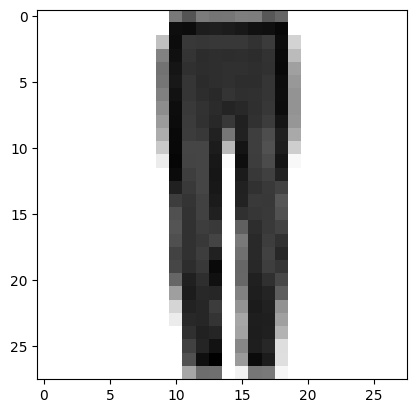

In [59]:
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

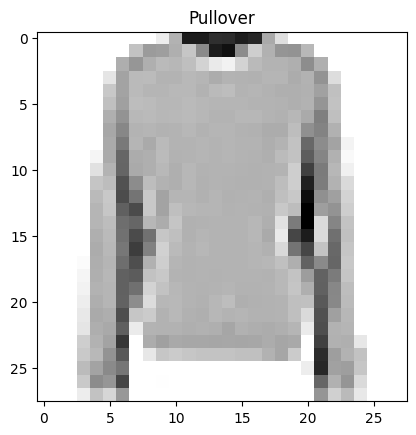

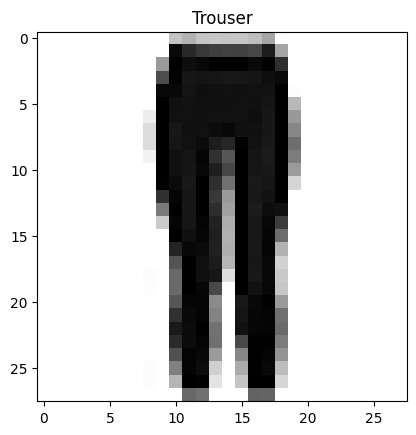

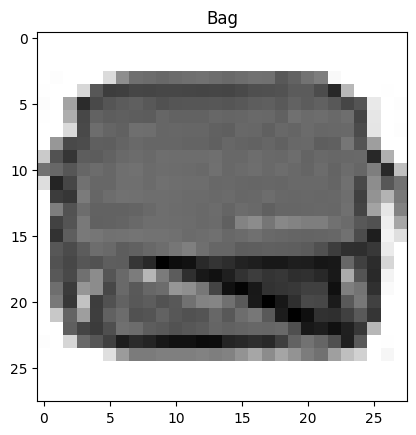

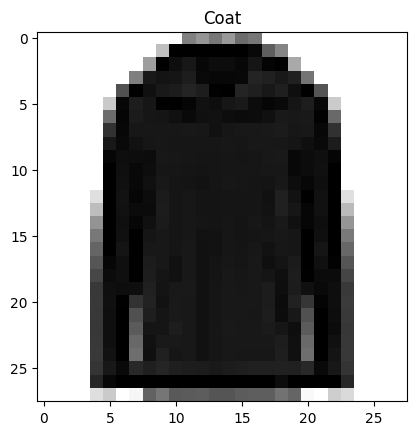

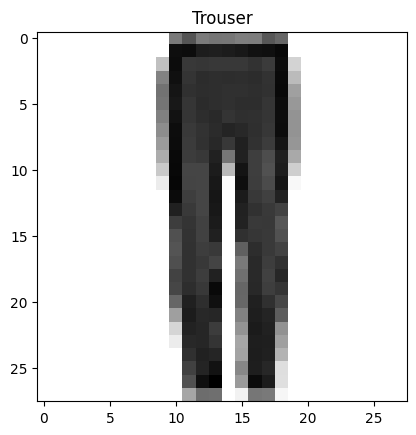

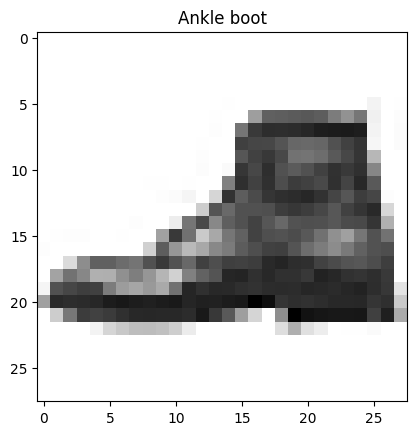

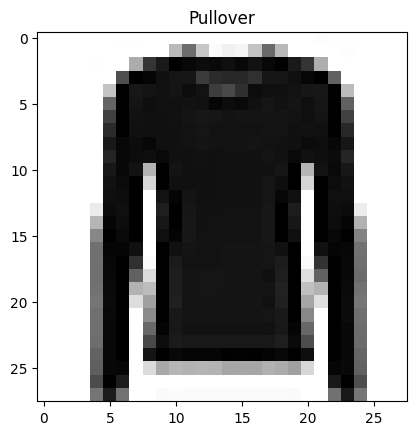

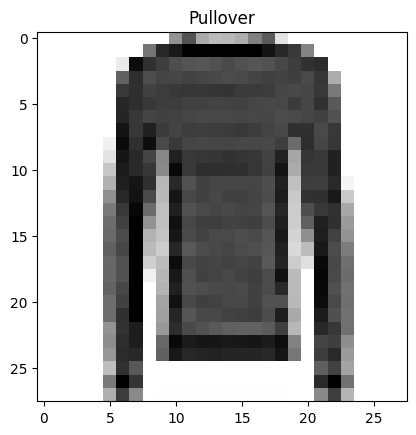

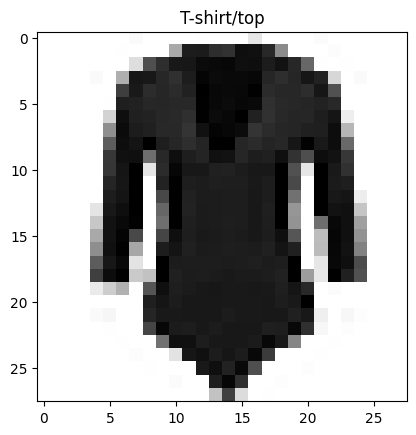

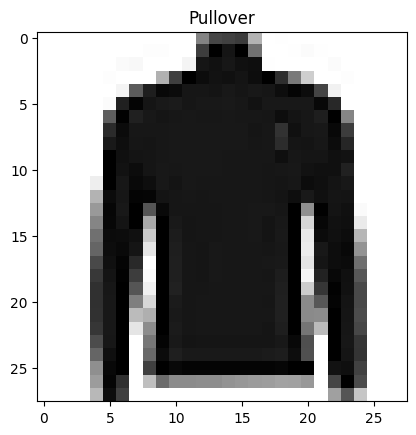

In [60]:
for i, (image,label) in enumerate(train_dataset.take(10)):
  image = image.numpy().reshape((28,28))
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title(class_names[label])
  plt.show()

In [61]:
l0 = tf.keras.layers.Flatten(input_shape = (28,28,1))

In [62]:
l1 = tf.keras.layers.Dense(128,activation=tf.nn.relu)

In [63]:
l2 = tf.keras.layers.Dense(10,activation=tf.nn.softmax)

In [64]:
model = tf.keras.Sequential([l0,l1,l2])

In [65]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [66]:
BATCH_SIZE = 32

In [67]:
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)

In [68]:
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [69]:
model.fit(train_dataset,epochs = 10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 3.0711 - accuracy: 0.6920
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6656 - accuracy: 0.7597
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5748 - accuracy: 0.8000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5353 - accuracy: 0.8135
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5119 - accuracy: 0.8249
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8321
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4911 - accuracy: 0.8317
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4795 - accuracy: 0.8371
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4729 - accuracy: 0.8400
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.47

In [70]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 2s 4ms/step - loss: 0.5780 - accuracy: 0.8179


In [71]:
print(f"Accuracy on the test data: {test_accuracy}")

Accuracy on the test data: 0.8179000020027161


1/1 [==============================] - 0s 52ms/step


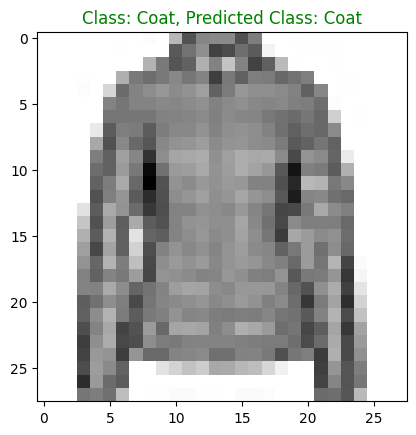

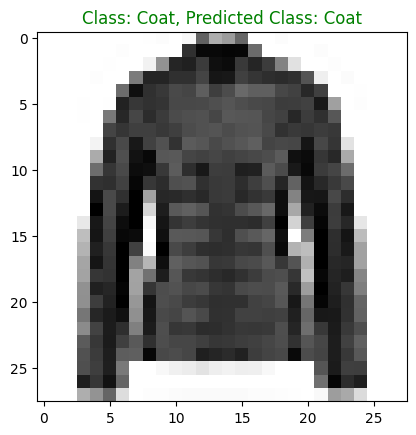

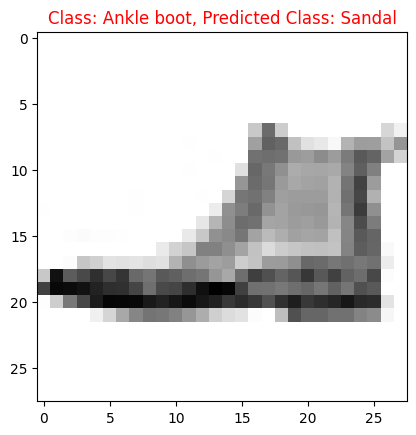

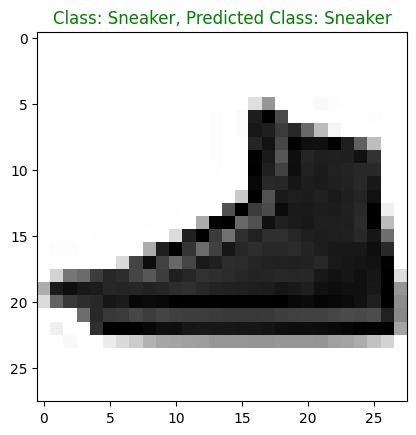

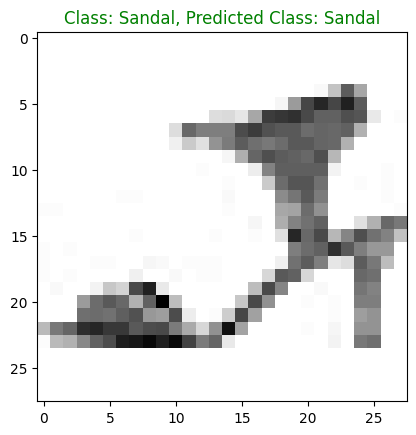

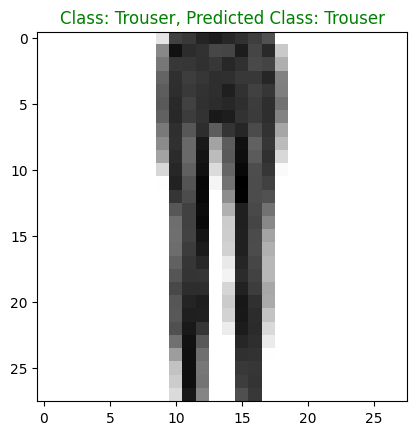

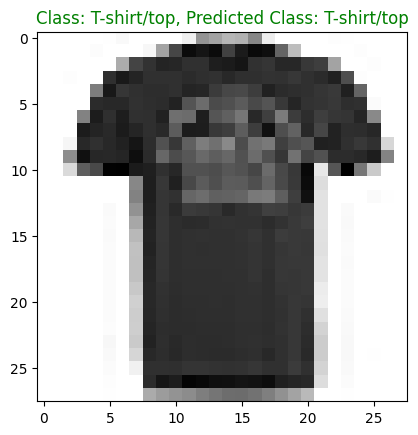

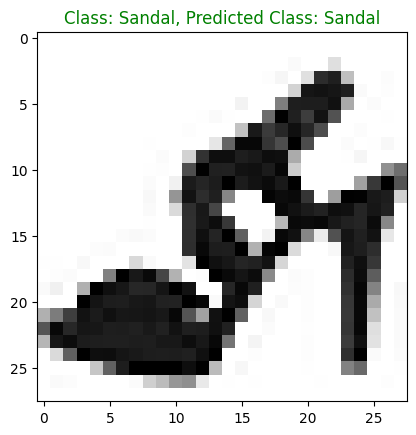

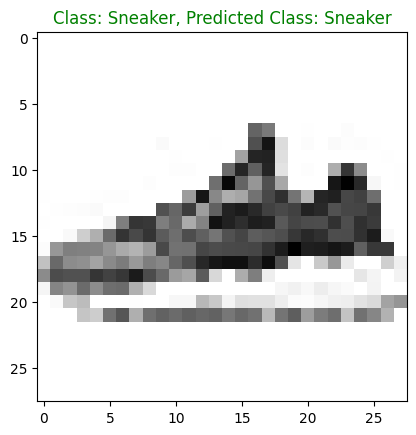

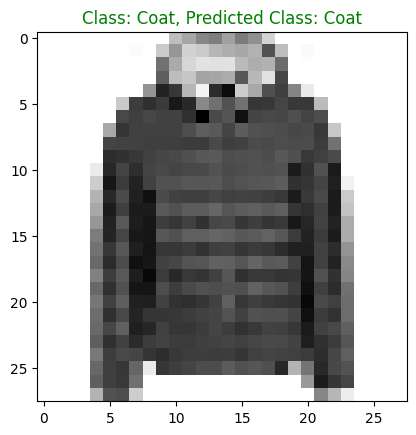

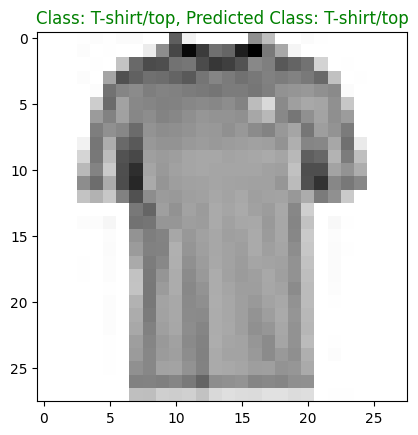

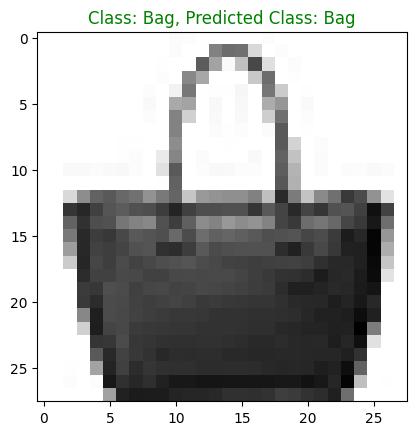

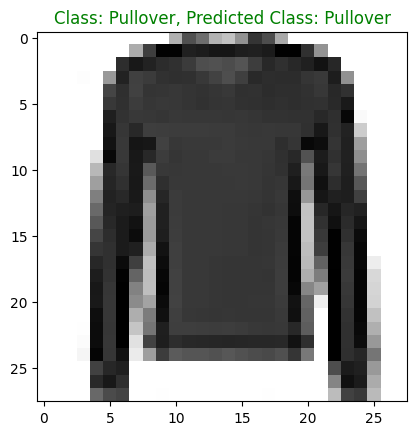

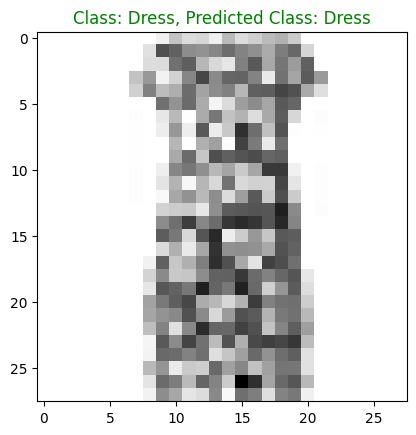

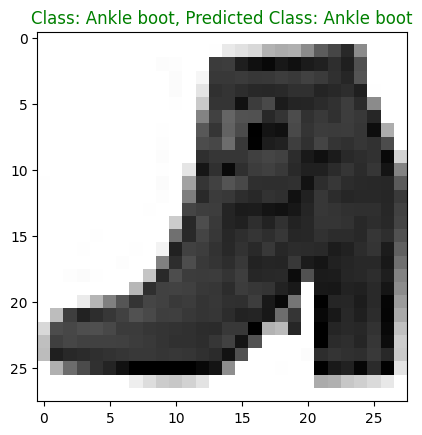

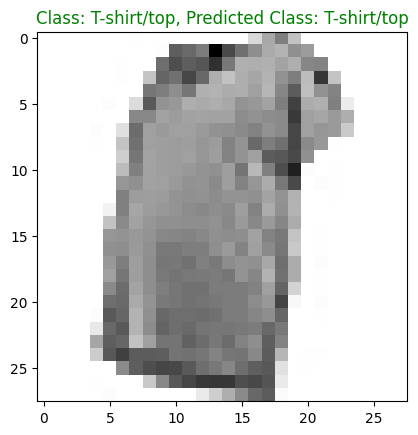

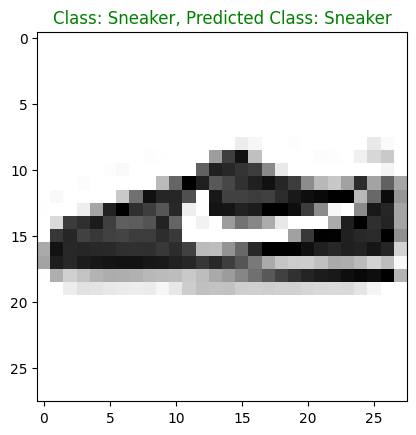

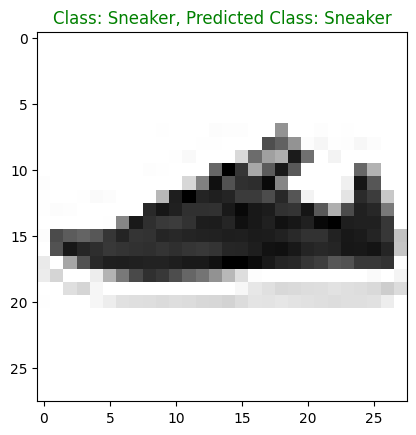

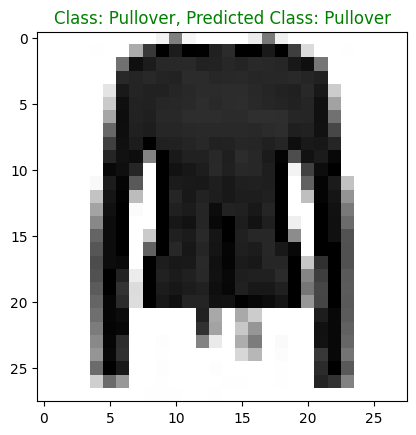

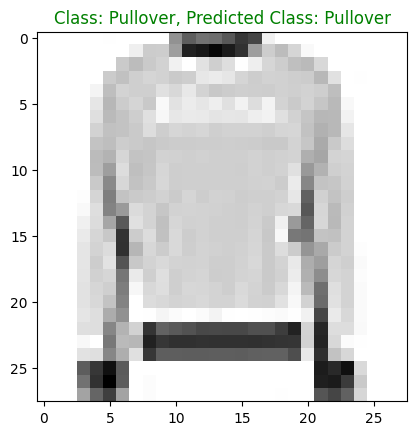

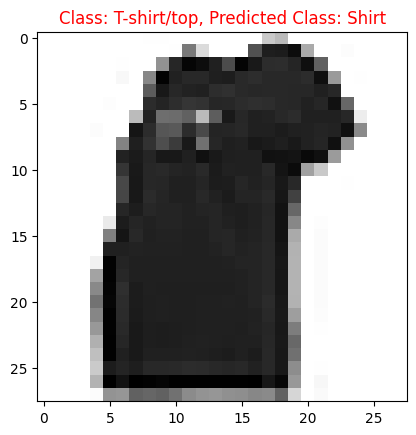

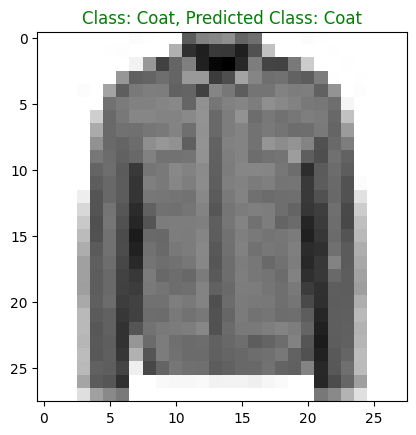

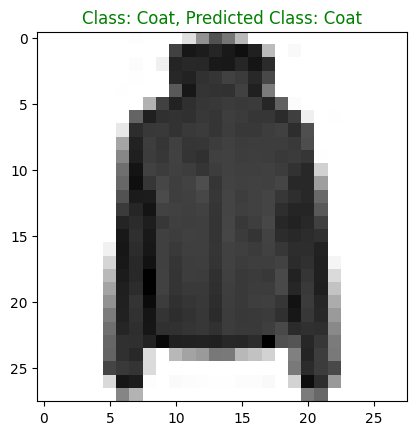

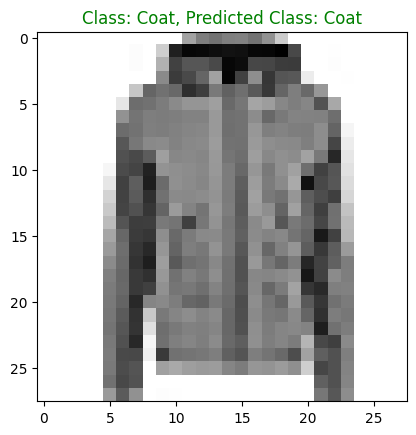

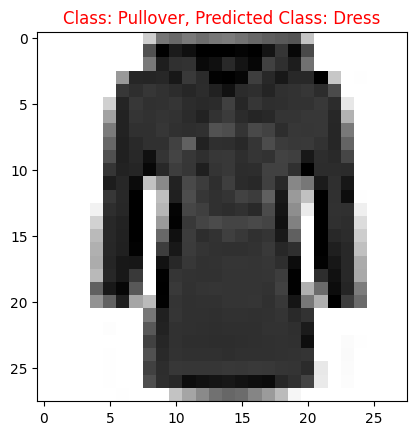

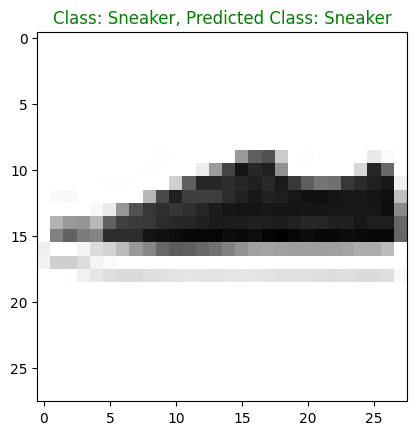

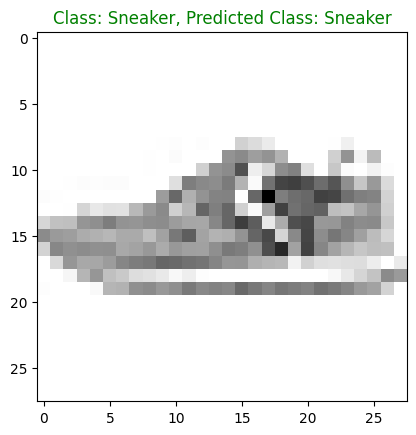

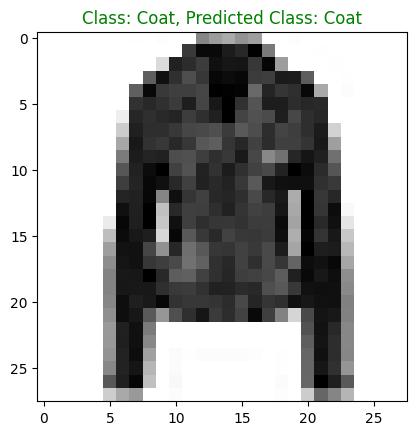

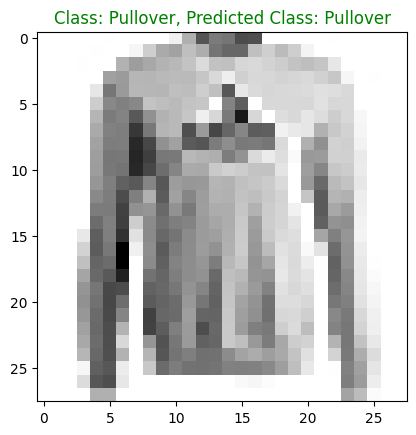

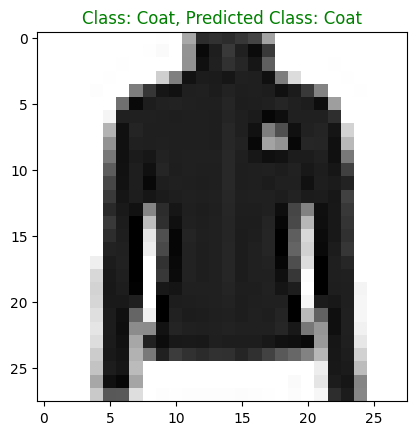

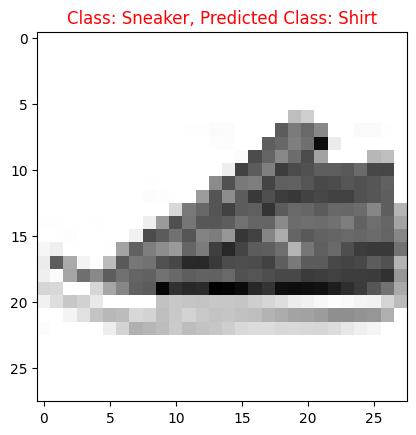

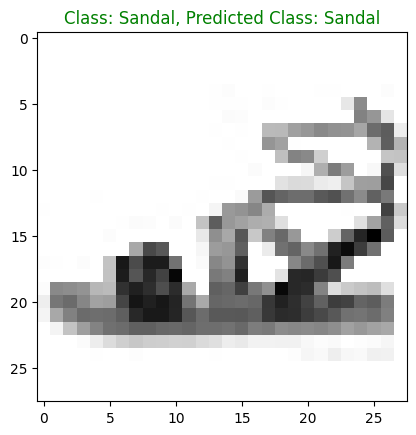

In [72]:
for test_image,test_label in test_dataset.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  Predicted_Class_Batch = model.predict(test_image)
  for i in range(BATCH_SIZE):
    Predicted_class = np.argmax(Predicted_Class_Batch[i])
    plt.imshow(test_image[i].reshape((28,28)), cmap=plt.cm.binary)
    if test_label[i] != Predicted_class:
      plt.title(f"Class: {class_names[test_label[i]]}, Predicted Class: {class_names[Predicted_class]}",color = "red")
    else:
      plt.title(f"Class: {class_names[test_label[i]]}, Predicted Class: {class_names[Predicted_class]}",color = "green")
    plt.show()